# Proyecto final: Aplicación de la ecuación logística en acuicultura

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Solución del sistema con condición inicial.

In [2]:
'''
Función que estima los valores numéricos de la 
solución de una EDO ordinaria de primer orden
mediante el método de Runge-Kutta de orden 2
Input:
    f: Ecuación diferencial ordinaria
    x: Valor de la condición inicial  x(t0)
    t: Valor de t en la condición inicial 
    h: Salto para el cálculo de la condición inicial
    N: Número de interaciones
'''
def RungeKutta2(F, x0, t0, h, N):
    v_t0=[]
    v_x0=[]
    for i in range(N):
        F1=h*float(F(x0))
        t0=t0+h
        F2=h*float(F(x0 + F1))
        x0=x0+(1/2)*(F1+F2)
        v_t0.append(float(t0))
        v_x0.append(float(x0))
    return v_t0,v_x0 

In [38]:
#Parámetros del sistema 
r = 0.926
K = 10
H = 0.8

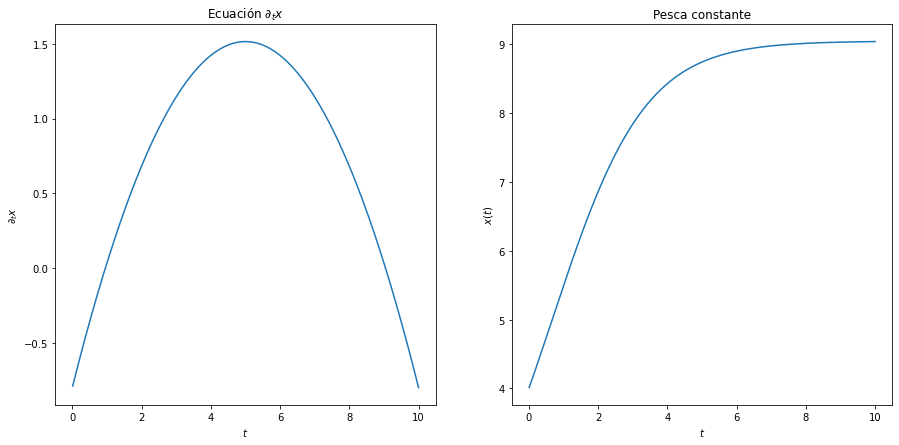

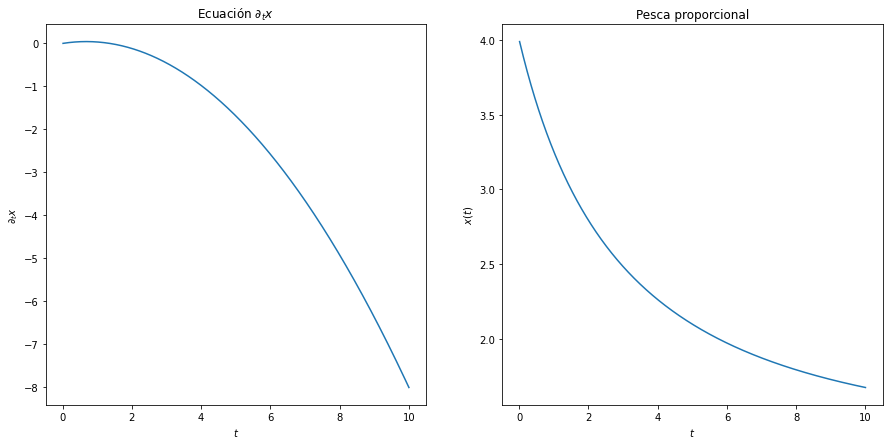

In [42]:
'''
Output: Vectores x0 y t0 con los valores estimado de la
        EDO ordinaria 
'''
def logistica(x0):
    return r*x0*(1 - (x0/K))

def pescaConstante(x0):
    return r*x0*(1 - (x0/K)) - H

def pescaProporcional(x0):
    return r*x0*(1 - (x0/K)) - H*x0

#Condiciones iniciales
t0 = 0.0001
x0 = 4

#Calcular el valor de la solucion para cada modelo
t1, x1 = RungeKutta2(logistica, x0, t0, 0.01, 1000)
t2, x2 = RungeKutta2(pescaConstante, x0, t0, 0.01, 1000)
t3, x3 = RungeKutta2(pescaProporcional, x0, t0, 0.01, 1000)

#Calcular el valor de la derivada para cada modelo
ec2 = []
ec3 = []
for i in t1:
    ec2.append(pescaConstante(i))
    ec3.append(pescaProporcional(i))

#Ecuacion Pesca Constante
f2 = plt.figure(figsize=(15,7)); plt.ioff()
lienzo21 = f2.add_subplot(1,2,1)
lienzo22 = f2.add_subplot(1,2,2)
lienzo21.set_xlabel(r'$t$')
lienzo21.set_ylabel(r'$\partial_t x$')
lienzo21.set_title(r'Ecuación $\partial_t x$')
lienzo21.plot(t2,ec2)
lienzo22.set_xlabel(r'$t$')
lienzo22.set_ylabel(r'$x(t)$')
lienzo22.set_title(r'Pesca constante')
lienzo22.plot(t2,x2)
plt.ion(); plt.draw()

#Ecuacion Pesca Proporcional
f3 = plt.figure(figsize=(15,7)); plt.ioff()
lienzo31 = f3.add_subplot(1,2,1)
lienzo32 = f3.add_subplot(1,2,2)
lienzo31.set_xlabel(r'$t$')
lienzo31.set_ylabel(r'$\partial_t x$')
lienzo31.set_title(r'Ecuación $\partial_t x$')
lienzo31.plot(t3,ec3)
lienzo32.set_xlabel(r'$t$')
lienzo32.set_ylabel(r'$x(t)$')
lienzo32.set_title(r'Pesca proporcional')
lienzo32.plot(t3,x3)
plt.ion(); plt.draw()

## Campo de pendientes.

In [35]:
def f(x,y):
    return r*y*(1-(y/K))-H

In [36]:
def g(x,y):
    return r*y*(1-(y/K))-y*H

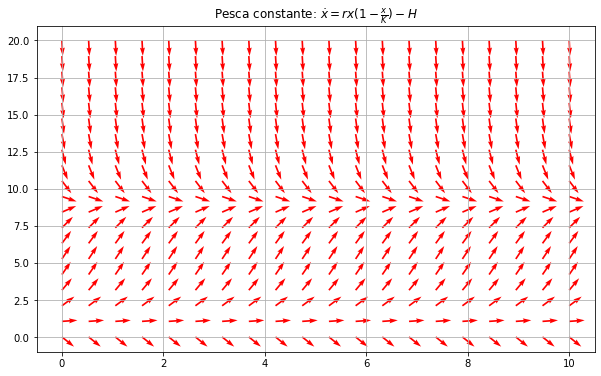

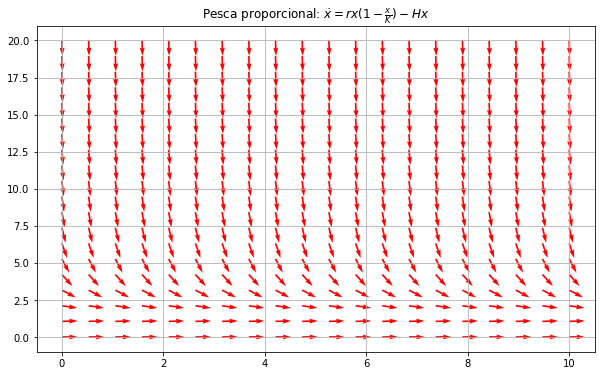

In [40]:
N = 20

x = np.linspace(0, 10, N)
y = np.linspace(0, 20, N)

X, Y = np.meshgrid(x,y) #dos matrices de 20 por 20

U = 1; V = f(X,Y)
U2, V2 = U/np.sqrt(U**2 + V**2),V/np.sqrt(U**2 + V**2)

fig = plt.figure(figsize = (10,6))
plt.quiver(X,Y,U2,V2,color = 'r')
plt.grid(True)
plt.title(r'Pesca constante: $\dot{x} = rx(1-\frac{x}{K})-H$');

U = 1; V = g(X,Y)
U2, V2 = U/np.sqrt(U**2 + V**2),V/np.sqrt(U**2 + V**2)

fig = plt.figure(figsize = (10,6))
plt.quiver(X,Y,U2,V2,color = 'r')
plt.grid(True)
plt.title(r'Pesca proporcional: $\dot{x} = rx(1-\frac{x}{K})-Hx$');

## Diagramas de bifurcación.

In [26]:
def bifNodoSillaEsta(H):
    return 0.5*(10+np.sqrt(10**2-((4*10*H)/0.926)))

In [27]:
def bifNodoSillaInes(H):
    return 0.5*(10-np.sqrt(10**2-((4*10*H)/0.926)))

In [28]:
x = np.linspace(0.1,1,200)

y1 = []
y1 = bifNodoSillaEsta(x1)

y2 = []
y2 = bifNodoSillaInes(x1)

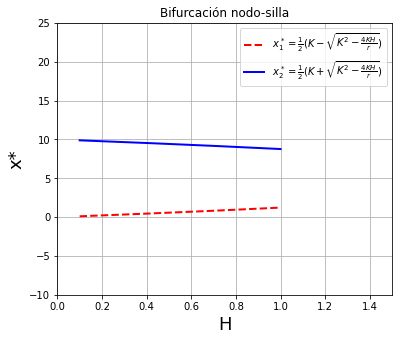

In [32]:
figura = plt.figure(figsize=(6,5))
plt.plot(x1,y2,'r--', linewidth = 2, label = r'$x_1^*=\frac{1}{2}(K-{\sqrt{K^2-\frac{4KH}{r}}})$')
plt.plot(x1,y1,'b-',linewidth = 2, label = r'$x_2^*=\frac{1}{2}(K+{\sqrt{K^2-\frac{4KH}{r}}})$')
plt.xlabel('H', size = 18)
plt.ylabel('x*', size = 18)
plt.title('Bifurcación nodo-silla')
plt.ylim(-10,25)
plt.xlim(0,1.5)
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def bifTranscritica(H):
    return ((0.926-H)*10)/0.926

In [11]:
x1 = np.linspace(0.001,0.926,200)
y=[]
y=bifTranscritica(x1)
x2 = np.linspace(0.926, 1, 200)
z = []
z = bifTranscritica(x2)
x = np.zeros(200)
#x4 = np.linspace(0.1, 1, 200)

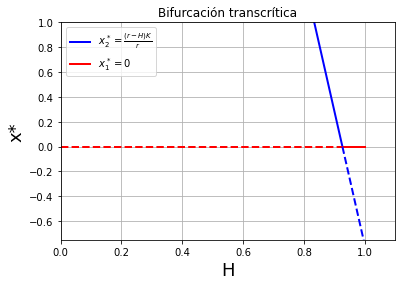

In [16]:
figura = plt.figure(figsize=(6,4))
plt.plot(x1,y,'b-',linewidth = 2, label = r'$x_2^*= \frac{(r-H)K}{r}$')
plt.plot(x1,x,'r--', linewidth = 2)
plt.plot(x2, x, 'r-', label = r'$x_1^*= 0$', linewidth=2)
plt.plot(x2, z, 'b--', linewidth=2)
plt.xlabel('H', size = 18)
plt.ylabel('x*', size = 18)
plt.title('Bifurcación transcrítica')
plt.ylim(-0.75,1)
plt.xlim(0,1.1)
plt.grid(True)
plt.legend()
plt.show()